In [1]:
import torch

x=torch.arange(4.0,requires_grad=True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [2]:
x.requires_grad_(True)
x.grad==None

True

In [3]:
y=2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [5]:
x.grad==4*x

tensor([True, True, True, True])

In [6]:
x.grad.zero_()
y=x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [7]:
x.grad.zero_()
y=x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [8]:
x.grad.zero_()
y=x*x
u=y.detach()
z=u*x
z.sum().backward()
x.grad==u

tensor([True, True, True, True])

In [9]:
x.grad.zero_()
y.sum().backward()
x.grad==2*x

tensor([True, True, True, True])

In [10]:
def f(a):
    b=a*2
    while b.norm()<1000:
        b=b*2
    if b.sum()>0:
        c=b
    else:
        c=100*b
    return c

a=torch.randn(size=(),requires_grad=True)
d=f(a)
d.backward()
a.grad==d/a

tensor(True)

In [11]:
x.grad.zero_()
y=2*torch.dot(x,x)
y.backward()
try:
    y.backward()
except Exception as e:
    print(e)

Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.


In [12]:
a=torch.randn(size=(3,4),requires_grad=True)
d=f(a)
d

tensor([[   9288.2969,   17480.5918,  -27869.7480,  -24474.6875],
        [  80635.1719, -100060.3906,   29825.8418,   11674.0527],
        [ -49904.5938,  -12522.9365,  -13290.7559,   53408.4453]],
       grad_fn=<MulBackward0>)

In [13]:
def g(a):
    b=a*2
    while b.norm()<1000:
        b=b*2
    return b

a=torch.randn(size=(3,4),requires_grad=True)
d=g(a)
d.backward(torch.ones_like(d))
a.grad

tensor([[512., 512., 512., 512.],
        [512., 512., 512., 512.],
        [512., 512., 512., 512.]])

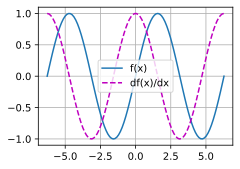

In [14]:
x=torch.linspace(-2*torch.pi,2*torch.pi,100,requires_grad=True)
y=torch.sin(x)
y.backward(torch.ones_like(y))

from d2l import torch as d2l
d2l.plot(x.detach(),[y.detach(),x.grad],legend=['f(x)','df(x)/dx'])

In [15]:
x = torch.ones(2, 2, requires_grad=True)
x,x.grad_fn

(tensor([[1., 1.],
         [1., 1.]], requires_grad=True),
 None)

In [16]:
y=x+2
y,y.grad_fn

(tensor([[3., 3.],
         [3., 3.]], grad_fn=<AddBackward0>),
 <AddBackward0 at 0x1f357e36820>)

In [17]:
x.is_leaf,y.is_leaf

(True, False)

In [18]:
z=y*y*3
out=z.mean()
z,out

(tensor([[27., 27.],
         [27., 27.]], grad_fn=<MulBackward0>),
 tensor(27., grad_fn=<MeanBackward0>))

In [19]:
a = torch.randn(2, 2) # 缺失情况下默认 requires_grad = False
a = (a * 3) / (a - 1)
print(a.requires_grad) # False
a.requires_grad_(True)
print(a.requires_grad) # True
b = (a * a).sum()
print(b.grad_fn)

False
True


In [20]:
out.backward()
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [22]:
out2=x.sum()
out2.backward()
x.grad

tensor([[5.5000, 5.5000],
        [5.5000, 5.5000]])

In [23]:
out3=x.sum()
x.grad.zero_()
out3.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

In [24]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = 2 * x
z = y.view(2, 2)
z

tensor([[2., 4.],
        [6., 8.]], grad_fn=<ViewBackward0>)

In [25]:
v = torch.tensor([[1.0, 0.1], [0.01, 0.001]], dtype=torch.float)
z.backward(v)
x.grad

tensor([2.0000, 0.2000, 0.0200, 0.0020])

In [26]:
x = torch.tensor(1.0, requires_grad=True)
y1 = x ** 2 
with torch.no_grad():   #中断梯度追踪
    y2 = x ** 3
y3 = y1 + y2

y1,y2,y3

(tensor(1., grad_fn=<PowBackward0>),
 tensor(1.),
 tensor(2., grad_fn=<AddBackward0>))

In [27]:
y1.requires_grad,y2.requires_grad,y3.requires_grad

(True, False, True)

In [28]:
y3.backward()
x.grad

tensor(2.)

In [29]:
x = torch.ones(1,requires_grad=True)
x.data,x.data.requires_grad

(tensor([1.]), False)

In [30]:
y = 2 * x
x.data *= 100
y.backward()

x,x.grad

(tensor([100.], requires_grad=True), tensor([2.]))